# **House Price Prediction in Bangalore**

IMPORTING NECESSARY LIBRARY
1. PANDAS
2. NUMPY
3. MATPLOTLIB

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns


# Reading the CSV & INFO

In [12]:
raw_data = pd.read_csv("BHP.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [13]:
raw_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
raw_data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [15]:
raw_data.shape


(13320, 9)

PATROL THROUGH COLUMNS

In [16]:

print(raw_data.groupby('area_type')['area_type'].agg('count'))


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64


In [17]:
print(raw_data.groupby('size')['size'].agg('count'))

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64


SIZE column looks pretty messed up, need to get it cleaned

In [18]:
raw_data=raw_data.drop(columns=['society','availability','balcony'])
raw_data.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


Also columns SOCIETY, AVAILABILITY look no helpful, since price doesnt depend on availability.
In addition to that column SOCIETY looks like has alot Null values, so its better not to consider it.

# Checking for NULL values & excluding them from dataset

In [19]:
raw_data.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [20]:
mod_data =raw_data.dropna()
mod_data.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

now no null values so good and done.

Lets clean column size

In [21]:
mod_data['BHK'] = mod_data['size'].apply(lambda x: int(x.split(' ')[0]))
mod_data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_24876\2054191112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_data['BHK'] = mod_data['size'].apply(lambda x: int(x.split(' ')[0]))


,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


Lets take a look at coulmn total_sqft
they contain interval.

In [22]:
mod_data['total_sqft'].unique() 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

mod_data[~mod_data['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


lets get this cleaned

In [24]:
def convert_class(x):
    tokens = x.split('-')
    if tokens == 2:
        return ((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None
mod_data['total_sqft'] = mod_data['total_sqft'].apply(convert_class)
mod_data.total_sqft
mod_data=mod_data.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_24876\615270779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_data['total_sqft'] = mod_data['total_sqft'].apply(convert_class)


In [25]:
mod_data['price_per_sqft'] = mod_data['price']*100000/mod_data['total_sqft']
mod_data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_24876\281097370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_data['price_per_sqft'] = mod_data['price']*100000/mod_data['total_sqft']


,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


lets look in location column

In [26]:
location_stats=mod_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             517
Sarjapur  Road         386
Electronic City        302
Kanakpura Road         260
Thanisandra            222
                      ... 
Kamdhenu Nagar           1
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
whitefiled               1
Name: location, Length: 1298, dtype: int64

lets eliminate location with very less periodicity
rename them as OTHER

In [27]:
less_periodicity=location_stats[location_stats<=10]
len(less_periodicity)

1059

In [28]:
mod_data.location = mod_data.location.apply(lambda x: 'other' if x in less_periodicity else x)
mod_data.location.unique()
len(mod_data.location.unique())

C:\Users\hp\AppData\Local\Temp\ipykernel_24876\769287984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_data.location = mod_data.location.apply(lambda x: 'other' if x in less_periodicity else x)


240

Hecne they are removed

In [29]:
mod_data.head()

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


now lets check if the total_sqft is justifed aganist no.of rooms
lets us have treshold of 300 sqft
for those rooms have < 300 sqft is not considered.

In [30]:
mod_data = mod_data[~(mod_data['total_sqft'] / mod_data['BHK']<300)]
mod_data.shape

(12312, 8)

lests again take look at total_sqft, how much is standard deviation

In [31]:
mod_data.head()

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [32]:
mod_data.total_sqft.describe()

count    12312.000000
mean      1589.702335
std       1261.895153
min        300.000000
25%       1118.000000
50%       1300.000000
75%       1700.000000
max      52272.000000
Name: total_sqft, dtype: float64

<AxesSubplot: xlabel='total_sqft', ylabel='Count'>

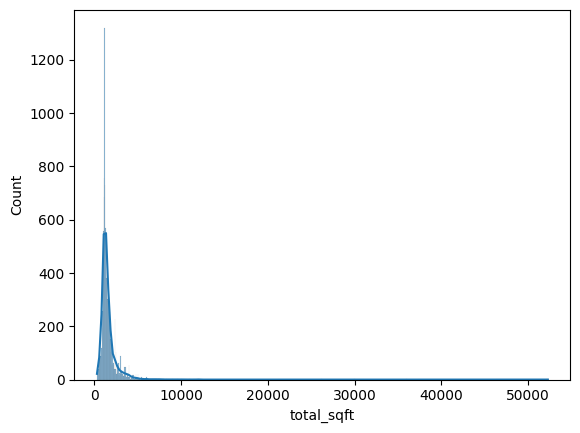

In [54]:
sns.histplot(mod_data.total_sqft,kde=True)

In [33]:
def remove_pps_outliers(df):
    print(df.shape)
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

new_data = remove_pps_outliers(mod_data)
new_data.shape

(12312, 8)


(10150, 8)

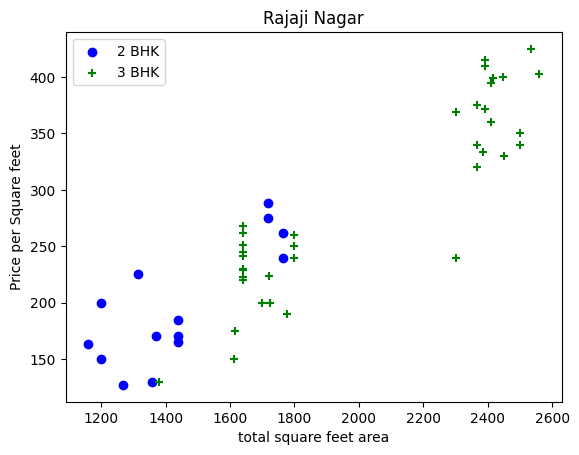

In [34]:
def plot_scatter_chart(df,location):
    bhk2 = new_data[(new_data.location==location)&(new_data.BHK==2)]
    bhk3 = new_data[(new_data.location==location)&(new_data.BHK==3)]
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK')
    plt.xlabel("total square feet area")
    plt.ylabel("Price per Square feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(new_data,'Rajaji Nagar')

Text(0, 0.5, 'Count')

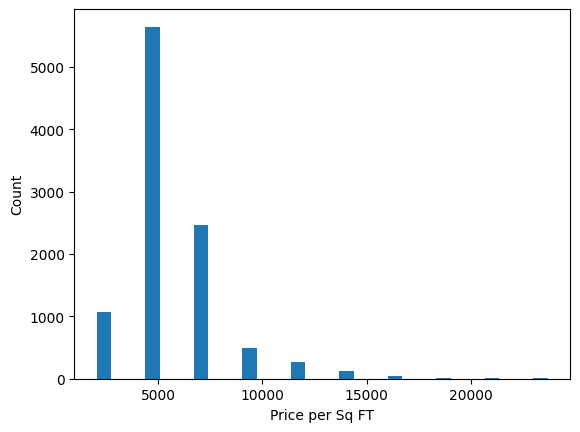

In [35]:
plt.hist(new_data.price_per_sqft,rwidth=0.3)
plt.xlabel('Price per Sq FT')
plt.ylabel('Count')


lets take a look at bathrooms

In [36]:
new_data[new_data.bath>new_data.BHK+2]

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
1622,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5172,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6628,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8305,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


needed to remove access bathroom.

In [37]:
new_data=new_data[new_data.bath<=new_data.BHK+2]
new_data.shape

(10146, 8)

In [38]:
new_data = new_data.drop(['area_type','price_per_sqft','size'],axis='columns')
new_data.head()

,location,total_sqft,bath,price,BHK
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3


So clean and Done.

# Hot encodeing for features

In [39]:
loc_dum=pd.get_dummies(new_data.location)
loc_dum

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now append these to data set

but remove one dummies to avoid  1 dummies trap

In [40]:
final_data =pd.concat([new_data.drop('location',axis='columns'),loc_dum.drop('other',axis='columns')],axis='columns')
final_data.head()

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we remove price Dependent variable form dataset for X

In [41]:
X = final_data.drop('price',axis='columns')
X.head()


,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


appending Dependent variable for y

In [42]:
y = final_data.price
y.head()


0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

# Train Test split data set

In [43]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

Test size should be 20% of data set for better results.

# Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7835430928501613

We got a score of 78% for Linear Regression, which is decent ok. But we need to cross validate the model.

# Cross Validation

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=1)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.78496002, 0.8397646 , 0.87023332, 0.82457875, 0.84121324])

Since the model gives a score of above 80%, the model is working well.

Lets try other regression, we use gridsearchCV  to find the best model.

In [46]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [47]:
from distutils.command.config import config
from pyexpat import model


def best_model_using_GridsearchCV(X,y):
    algos={
        'linear regression':{
            'model': LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
       },
       'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random','cyclic']
        }
       },
       'decision_tree':{
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error','friedman_mse'],
            'splitter': ['best','random']
        }
       }
    }

    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_scores': gs.best_score_,
            'best_params': gs.best_params_

        })
    return pd.DataFrame(scores,columns=['model','best_scores','best_params'])

best_model_using_GridsearchCV(X,y)

     

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior

,model,best_scores,best_params
0,linear regression,0.796791,{'normalize': False}
1,lasso,0.663022,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.665686,"{'criterion': 'squared_error', 'splitter': 'be..."


The Best Model is Linear Regression with 79% score.
The best parameter is Normalize: False

In [48]:
X.columns

Index(['total_sqft', 'bath', 'BHK', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=242)

In [49]:
 def predict_price(location,sqft,bath,BHK):
    loc_index = np.where(X.columns==location)[0][0]

    x=np.zeros(len(X.columns))
    x[0]= sqft
    x[1]= bath
    x[2]= BHK
    if loc_index>=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

predict_price('1st Phase JP Nagar',1000,2,2)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.76679542286385

In [50]:
predict_price('1st Phase JP Nagar',1000,3,3)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.18443583012112

In [51]:
predict_price('Indira Nagar',1000,3,3)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


154.15155101573703

In [52]:
import pickle
with open('BHP.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [53]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))